In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data filesschool_data_to_load = Path("../Resources/schools_complete.csv")
mouse_metadata_path = ("../data/Mouse_metadata.csv")
study_results_path = ("../data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_metadata = pd.merge (mouse_metadata, study_results, how='inner', on=['Mouse ID'])

# Display the data table for preview
full_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the full DataFrame.
full_metadata ['Mouse ID'].count()

1893

In [5]:
# Checking the number of mice.
full_metadata['Mouse ID'].unique()

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [6]:
Mice_count = full_metadata['Mouse ID'].nunique()
Mice_count

249

In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

the_dublicated = full_metadata.loc[full_metadata.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique() 
the_dublicated

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 


duplicate_rows = full_metadata.duplicated()
duplicate_items = full_metadata.loc[duplicate_rows]
print(duplicate_items)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0  


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_list = full_metadata.loc[full_metadata ["Mouse ID"] == "g989", :]
duplicated_list

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
duplicated_count = duplicated_list.count()
duplicated_count

Mouse ID              13
Drug Regimen          13
Sex                   13
Age_months            13
Weight (g)            13
Timepoint             13
Tumor Volume (mm3)    13
Metastatic Sites      13
dtype: int64

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicate_df = full_metadata[full_metadata['Mouse ID']!='g989']
drop_duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
drop_duplicate_df2 = full_metadata[full_metadata['Mouse ID'].isin(the_dublicated)==False]
drop_duplicate_df2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
drop_duplicate_df2.nunique()

Mouse ID               248
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1633
Metastatic Sites         5
dtype: int64

In [14]:
# Checking the number of mice in the clean DataFrame.
drop_duplicate_df2.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [15]:
# Checking the number of mice in the clean DataFrame.
drop_duplicate_df2['Mouse ID'].count()

1880

In [16]:
# Checking the number of mice in the clean DataFrame.
drop_duplicate_df['Mouse ID'].count()

1880

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

In [18]:
Mean_Tumor_Volume = full_metadata.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
Mean_Tumor_Volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [19]:
Median_Tumor_Volume = full_metadata.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
Median_Tumor_Volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.854632
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [20]:
varicance_Tumor_Volume = full_metadata.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
varicance_Tumor_Volume 
#print(full_metadata.groupby(['drug regimen'])['Tumor Volume (mm3)'].var())

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     42.351070
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [21]:
std_Tumor_Volume = full_metadata.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
std_Tumor_Volume 

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.507770
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [22]:
sem_Tumor_Volume = full_metadata.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
sem_Tumor_Volume 


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.512884
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [23]:
statistics_df = pd.DataFrame ({
    'Mean Tumor Volume':Mean_Tumor_Volume,
    'Median Tumor Volume':Median_Tumor_Volume,
     'Tumor Volume Variance':varicance_Tumor_Volume,
    'Tumor Volume Std. Dev.':std_Tumor_Volume,
    'Tumor Volume Std. Err':sem_Tumor_Volume 
    
})
statistics_df.head()

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [24]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

In [25]:
aggregation_method =  drop_duplicate_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem',])
aggregation_method

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [26]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

In [27]:

count_Timepoint = full_metadata.groupby(['Drug Regimen'])['Timepoint'].count()
count_Timepoint.sort_values()

Drug Regimen
Propriva     161
Ceftamin     178
Infubinol    178
Placebo      181
Stelasyn     181
Zoniferol    182
Naftisol     186
Ketapril     188
Ramicane     228
Capomulin    230
Name: Timepoint, dtype: int64

In [28]:
observation = drop_duplicate_df.groupby(['Drug Regimen'])['Mouse ID'].count()
observation.sort_values()

Drug Regimen
Propriva     148
Ceftamin     178
Infubinol    178
Placebo      181
Stelasyn     181
Zoniferol    182
Naftisol     186
Ketapril     188
Ramicane     228
Capomulin    230
Name: Mouse ID, dtype: int64

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

Text(0, 0.5, '# of observed mouse Timpoints')

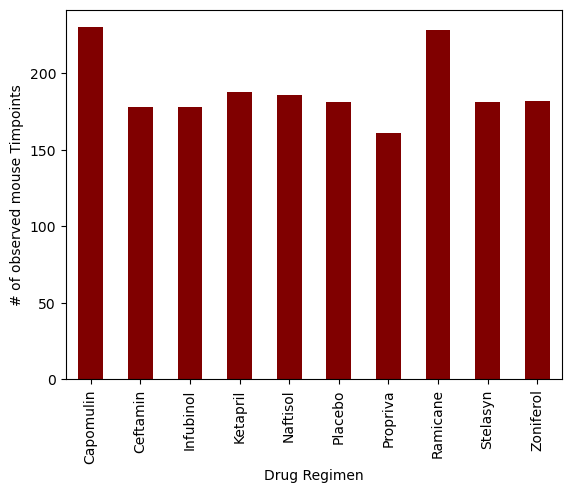

In [30]:
bar_chart_plot = count_Timepoint.plot.bar(color='maroon')
plt.ylabel("# of observed mouse Timpoints")

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

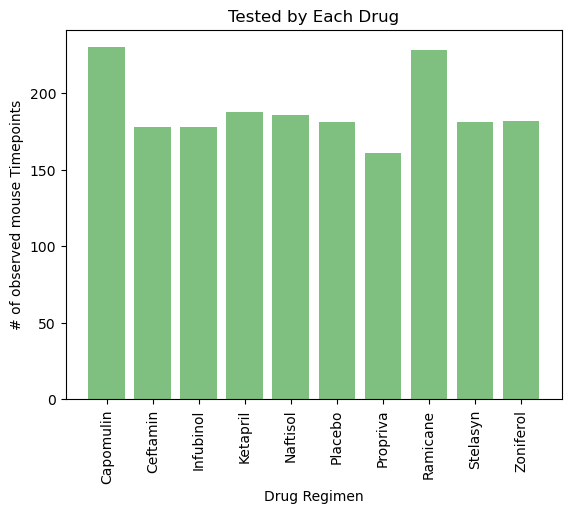

In [32]:
x_axis = count_Timepoint.index.values
y_axis = count_Timepoint.values
plt.bar(x_axis, y_axis, color='green', alpha=0.5, align='center')

plt.title("Tested by Each Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

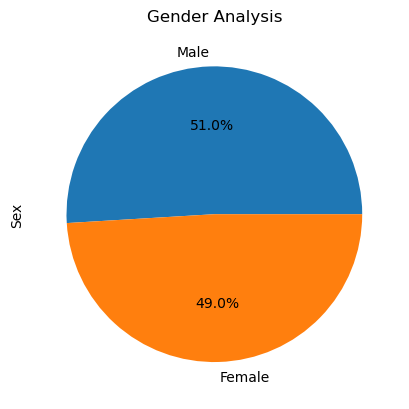

In [34]:
gender_distribution = drop_duplicate_df["Sex"].value_counts()
drop_duplicate_df
plt.title("Gender Analysis")
gender_distribution.plot.pie(autopct= "%1.1f%%")
plt.show()

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

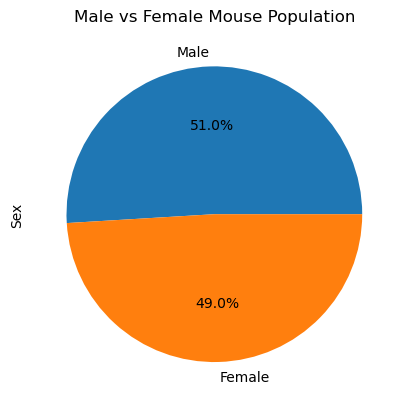

In [36]:
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_distribution.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [38]:
# Capomulin

In [39]:
#list all capomulin drug rows
Capomulin_info = drop_duplicate_df.loc[drop_duplicate_df ["Drug Regimen"] == "Capomulin",:]
Capomulin_info.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [40]:
# greatestt imepoint for each mouse under capomulin drug
final_capomulin = Capomulin_info.groupby(['Mouse ID'])['Timepoint'].max()
final_capomulin.head()
#the_last_capomulin = pd.DataFrame(final_capomulin).max()
#the_last_capomulin

Mouse ID
b128    45
b742    45
f966    20
g288    45
g316    45
Name: Timepoint, dtype: int64

In [41]:
# Merge with original DataFrame to get the tumor volume at the last timepoint
New_df = pd.merge(final_capomulin,drop_duplicate_df, how='inner',on=('Mouse ID','Timepoint'))
New_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [42]:
#Ramicane

In [43]:
#list all capomulin drug rows
Ramicane_info = drop_duplicate_df.loc[drop_duplicate_df ["Drug Regimen"] == "Ramicane",:]
Ramicane_info.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [44]:
# greatestt imepoint for each mouse under capomulin drug
final_Ramicane = Ramicane_info.groupby(['Mouse ID'])['Timepoint'].max()
final_Ramicane.head()

Mouse ID
a411    45
a444    45
a520    45
a644    45
c458    30
Name: Timepoint, dtype: int64

In [45]:
# Merge with original DataFrame to get the tumor volume at the last timepoint
New_df = pd.merge(final_Ramicane,drop_duplicate_df, how='inner',on=('Mouse ID','Timepoint'))
New_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [46]:
#Infubinol

In [47]:
#list all capomulin drug rows
Infubinol_info = drop_duplicate_df.loc[drop_duplicate_df ["Drug Regimen"] == "Infubinol",:]
Infubinol_info.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [48]:
# greatestt imepoint for each mouse under capomulin drug
final_Infubinol = Infubinol_info.groupby(['Mouse ID'])['Timepoint'].max()
final_Infubinol.head()

Mouse ID
a203    45
a251    45
a577    30
a685    45
c139    45
Name: Timepoint, dtype: int64

In [49]:
# Merge with original DataFrame to get the tumor volume at the last timepoint
New_df = pd.merge(final_Infubinol,drop_duplicate_df, how='inner',on=('Mouse ID','Timepoint'))
New_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [50]:
#Ceftamin

In [51]:
#list all capomulin drug rows
Ceftamin_info = drop_duplicate_df.loc[drop_duplicate_df ["Drug Regimen"] == "Ceftamin",:]
Ceftamin_info.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [52]:
# greatestt imepoint for each mouse under capomulin drug
final_Ceftamin = Ceftamin_info.groupby(['Mouse ID'])['Timepoint'].max()
final_Ceftamin.head()

Mouse ID
a275    45
b447     0
b487    25
b759    30
f436    15
Name: Timepoint, dtype: int64

In [55]:
# Merge with original DataFrame to get the tumor volume at the last timepoint
New_df = pd.merge(final_Ceftamin,drop_duplicate_df, how='inner',on=('Mouse ID','Timepoint'))
New_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = New_df['Drug Regimen']
treatment_list

# Create empty list to fill with tumor vol data (for plotting)
emp_list.append(New_df['Tumor Volume (mm3)'])
emp_list


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


NameError: name 'emp_list' is not defined